In [7]:
## TensorFlow Machine Learning Multivariable Linear Regression

# Initialisation
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

# Import ML packages
from tensorflow import keras
from tensorflow.keras import layers

# Import Google Drive to allow access to data
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Check TensorFlow Version
print(tf.__version__)

# Initialise variable that defines the location of dataset
dataLoc = '[REDACTED]'

# Read in dataset
df = pd.read_csv(dataLoc)

# Change the frame variable from numerical integer to categorical
df['Frame'] = df['Frame'].astype('category')

# Drop Weight and Remaining Load columns
df = df.drop(['Weight','RemLoad'], axis=1)

# Separate categorical variables into a boolean definition
df = pd.get_dummies(df, columns = ['Frame'],prefix = '', prefix_sep = '')
df = pd.get_dummies(df, columns = ['BattCells'],prefix = '', prefix_sep = '')

# Visual check of the dataframe to ensure that it is the same as what we are after
df.tail()

# Set the training and test datasets
train_data = df.sample(frac = 0.8, random_state = 0)
test_data = df.drop(train_data.index)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
2.13.0


In [8]:
# Define the nonlinear model build and compiler with 2 hidden layers and 1 linear layer
def LinearModel(normaliser):
  model = tf.keras.Sequential([
      normaliser,
      layers.Dense(units=1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
  return model


# Define Loss Function Plotting Code
def plotLoss(history,errorStr):
  plt.plot(history.history['loss'], label='Loss')
  plt.plot(history.history['val_loss'], label='Cross Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error ['+errorStr+']' )
  plt.legend()
  plt.grid(True)

# Define Regression Plot Code
def plotRegression(x,y,trainF,trainL,inputVarStr,outputVarStr):
  plt.scatter(trainF,trainL,label='Data')
  plt.plot(x,y, color='k', label='Predictions')
  plt.xlabel(inputVarStr)
  plt.ylabel(outputVarStr)
  plt.legend()

**Model 1 - KV from Inputs**

[[ 1.5284307  5.0584254  9.354618  18.572096 ]]
First example: [[ 0.58  3.85  5.79 13.4 ]]

Normalized: [[-1.39 -0.57 -0.73 -0.74]]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 4)                 9         
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 14 (60.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 9 (40.00 Byte)
_________________________________________________________________


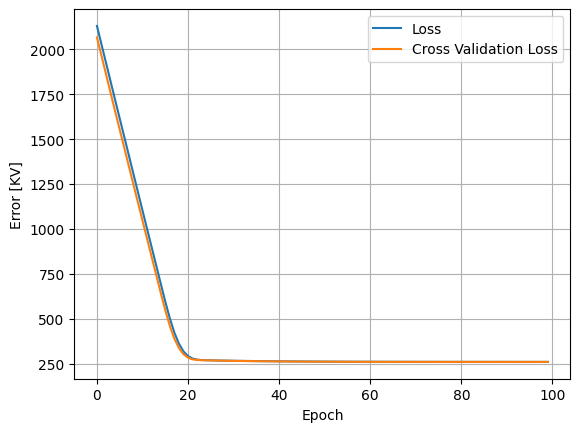

In [9]:
# Load data for the model
trainFeatures = train_data.copy()
testFeatures = test_data.copy()

# Identify the prediction variable
trainKV = trainFeatures.pop('KV')
testKV = testFeatures.pop('KV')

# Remove all non-input variables
trainFeaturesSubs = train_data[['MTOW','Range','Endurance','MaxSpeed']]
testFeaturesSubs = test_data[['MTOW','Range','Endurance','MaxSpeed']]

# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesSubs))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesSubs[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# As all input variables are already normalised, run model
multiLinModelKV = LinearModel(normalizer)

multiLinModelKV.summary()

# Run Model Fitting
history1 = multiLinModelKV.fit(
    trainFeaturesSubs,
    trainKV,
    validation_split=0.2,
    verbose=0, epochs=100)

# Define Error String
errorStr1 = 'KV'

# Plot Loss Function
plotLoss(history1,errorStr1)

# As the model is multivariate, save test results (cannot plot)
testResults = {}
testResults['multiLinModelKV'] = multiLinModelKV.evaluate(
    testFeaturesSubs,testKV,
    verbose=0)

323/323 [==============================] - 0s 804us/step


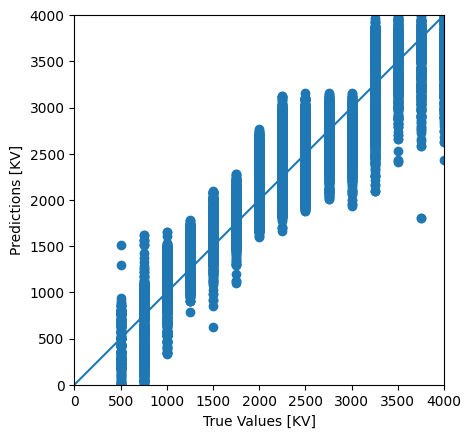

In [10]:
# Generate Plot for predictions
testPred1 = multiLinModelKV.predict(testFeaturesSubs).flatten()

a = plt.axes(aspect='equal')
plt.scatter(testKV, testPred1)
plt.xlabel('True Values [KV]')
plt.ylabel('Predictions [KV]')
lims = [0, 4000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

**Model 2 - Motor Diameter from Inputs**

[[ 1.5284307  5.0584254  9.354618  18.572096 ]]
First example: [[ 0.58  3.85  5.79 13.4 ]]

Normalized: [[-1.39 -0.57 -0.73 -0.74]]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_2 (Normaliza  (None, 4)                 9         
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 14 (60.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 9 (40.00 Byte)
_________________________________________________________________


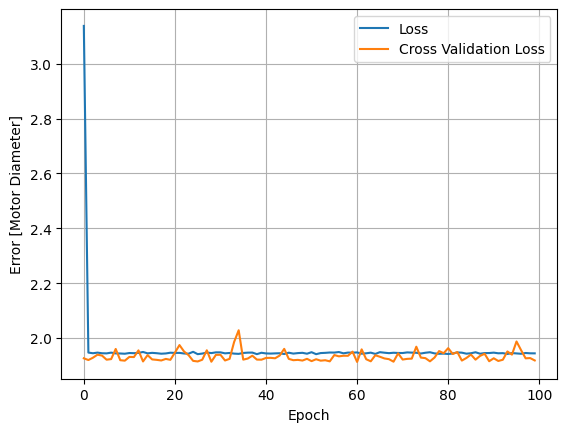

In [11]:
# Load data for the model
trainFeatures = train_data.copy()
testFeatures = test_data.copy()

# Identify the prediction variable
trainmotDiam = trainFeatures.pop('motDiam')
testmotDiam = testFeatures.pop('motDiam')

# Remove all non-input variables
trainFeaturesSubs = train_data[['MTOW','Range','Endurance','MaxSpeed']]
testFeaturesSubs = test_data[['MTOW','Range','Endurance','MaxSpeed']]

# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesSubs))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesSubs[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# As all input variables are already normalised, run model
multiLinModelmotDiam = LinearModel(normalizer)

multiLinModelmotDiam.summary()

# Run Model Fitting
history2 = multiLinModelmotDiam.fit(
    trainFeaturesSubs,
    trainmotDiam,
    validation_split=0.2,
    verbose=0, epochs=100)

# Define Error String
errorStr2 = 'Motor Diameter'

# Plot Loss Function
plotLoss(history2,errorStr2)

# As the model is multivariate, save test results (cannot plot)
testResults['multiLinModelmotDiam'] = multiLinModelmotDiam.evaluate(
    testFeaturesSubs,testmotDiam,
    verbose=0)

323/323 [==============================] - 0s 765us/step


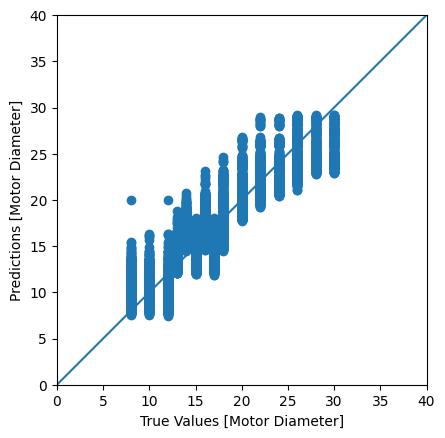

In [12]:
# Generate Plot for predictions
testPred2 = multiLinModelmotDiam.predict(testFeaturesSubs).flatten()

a = plt.axes(aspect='equal')
plt.scatter(testmotDiam, testPred2)
plt.xlabel('True Values [Motor Diameter]')
plt.ylabel('Predictions [Motor Diameter]')
lims = [0, 40]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

**Model 3 - Propeller Diameter from Inputs**

[[ 1.5284307  5.0584254  9.354618  18.572096 ]]
First example: [[ 0.58  3.85  5.79 13.4 ]]

Normalized: [[-1.39 -0.57 -0.73 -0.74]]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 4)                 9         
 tion)                                                           
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 14 (60.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 9 (40.00 Byte)
_________________________________________________________________


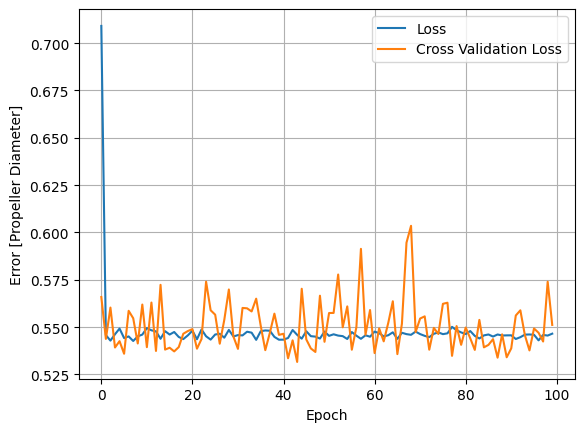

In [13]:
# Load data for the model
trainFeatures = train_data.copy()
testFeatures = test_data.copy()

# Identify the prediction variable
trainpropDiam = trainFeatures.pop('propDiam')
testpropDiam = testFeatures.pop('propDiam')

# Remove all non-input variables
trainFeaturesSubs = train_data[['MTOW','Range','Endurance','MaxSpeed']]
testFeaturesSubs = test_data[['MTOW','Range','Endurance','MaxSpeed']]

# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesSubs))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesSubs[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# As all input variables are already normalised, run model
multiLinModelpropDiam = LinearModel(normalizer)

multiLinModelpropDiam.summary()

# Run Model Fitting
history3 = multiLinModelpropDiam.fit(
    trainFeaturesSubs,
    trainpropDiam,
    validation_split=0.2,
    verbose=0, epochs=100)

# Define Error String
errorStr3 = 'Propeller Diameter'

# Plot Loss Function
plotLoss(history3,errorStr3)

# As the model is multivariate, save test results (cannot plot)
testResults['multiLinModelpropDiam'] = multiLinModelpropDiam.evaluate(
    testFeaturesSubs,testpropDiam,
    verbose=0)

323/323 [==============================] - 1s 4ms/step


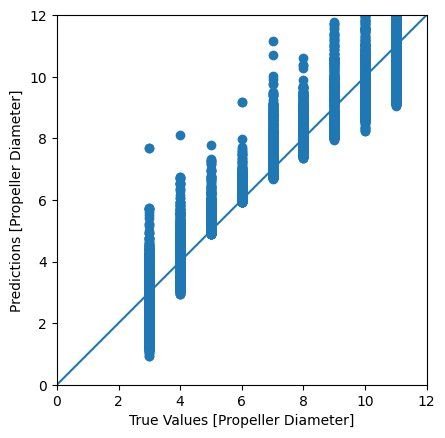

In [24]:
# Generate Plot for predictions
testPred3 = multiLinModelpropDiam.predict(testFeaturesSubs).flatten()

a = plt.axes(aspect='equal')
plt.scatter(testpropDiam, testPred3)
plt.xlabel('True Values [Propeller Diameter]')
plt.ylabel('Predictions [Propeller Diameter]')
lims = [0, 12]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

**Model 4 - Propeller Pitch from Inputs**

[[ 1.5284307  5.0584254  9.354618  18.572096 ]]
First example: [[ 0.58  3.85  5.79 13.4 ]]

Normalized: [[-1.39 -0.57 -0.73 -0.74]]
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 4)                 9         
 tion)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 14 (60.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 9 (40.00 Byte)
_________________________________________________________________


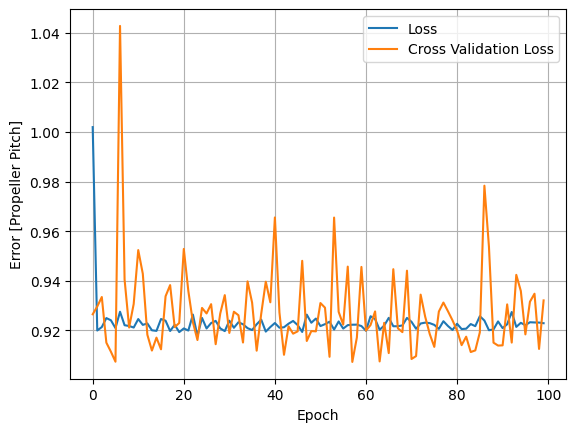

In [15]:
# Load data for the model
trainFeatures = train_data.copy()
testFeatures = test_data.copy()

# Identify the prediction variable
trainpropPitch = trainFeatures.pop('propPitch')
testpropPitch = testFeatures.pop('propPitch')

# Remove all non-input variables
trainFeaturesSubs = train_data[['MTOW','Range','Endurance','MaxSpeed']]
testFeaturesSubs = test_data[['MTOW','Range','Endurance','MaxSpeed']]

# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesSubs))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesSubs[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# As all input variables are already normalised, run model
multiLinModelpropPitch = LinearModel(normalizer)

multiLinModelpropPitch.summary()

# Run Model Fitting
history4 = multiLinModelpropPitch.fit(
    trainFeaturesSubs,
    trainpropPitch,
    validation_split=0.2,
    verbose=0, epochs=100)

# Define Error String
errorStr4 = 'Propeller Pitch'

# Plot Loss Function
plotLoss(history4,errorStr4)

# As the model is multivariate, save test results (cannot plot)
testResults['multiLinModelpropPitch'] = multiLinModelpropPitch.evaluate(
    testFeaturesSubs,testpropPitch,
    verbose=0)

323/323 [==============================] - 0s 741us/step


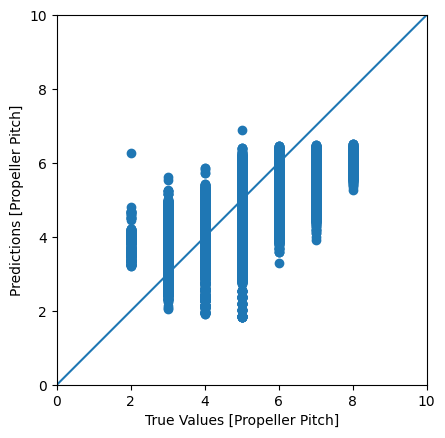

In [16]:
# Generate Plot for predictions
testPred4 = multiLinModelpropPitch.predict(testFeaturesSubs).flatten()

a = plt.axes(aspect='equal')
plt.scatter(testpropPitch, testPred4)
plt.xlabel('True Values [Propeller Pitch]')
plt.ylabel('Predictions [Propeller Pitch]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

**Model 5 - ESC Current from Inputs**

[[ 1.5284307  5.0584254  9.354618  18.572096 ]]
First example: [[ 0.58  3.85  5.79 13.4 ]]

Normalized: [[-1.39 -0.57 -0.73 -0.74]]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normaliza  (None, 4)                 9         
 tion)                                                           
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 14 (60.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 9 (40.00 Byte)
_________________________________________________________________


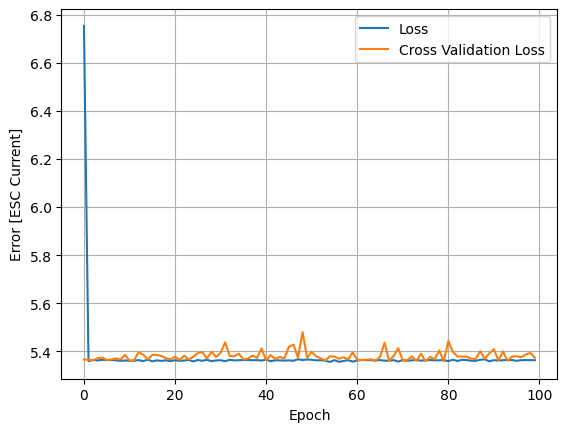

In [17]:
# Load data for the model
trainFeatures = train_data.copy()
testFeatures = test_data.copy()

# Identify the prediction variable
trainESCCurrent = trainFeatures.pop('ESCCurrent')
testESCCurrent = testFeatures.pop('ESCCurrent')

# Remove all non-input variables
trainFeaturesSubs = train_data[['MTOW','Range','Endurance','MaxSpeed']]
testFeaturesSubs = test_data[['MTOW','Range','Endurance','MaxSpeed']]

# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesSubs))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesSubs[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# As all input variables are already normalised, run model
multiLinModelESCCurrent = LinearModel(normalizer)

multiLinModelESCCurrent.summary()

# Run Model Fitting
history5 = multiLinModelESCCurrent.fit(
    trainFeaturesSubs,
    trainESCCurrent,
    validation_split=0.2,
    verbose=0, epochs=100)

# Define Error String
errorStr5 = 'ESC Current'

# Plot Loss Function
plotLoss(history5,errorStr5)

# As the model is multivariate, save test results (cannot plot)
testResults['multiLinModelESCCurrent'] = multiLinModelESCCurrent.evaluate(
    testFeaturesSubs,testESCCurrent,
    verbose=0)

323/323 [==============================] - 0s 756us/step


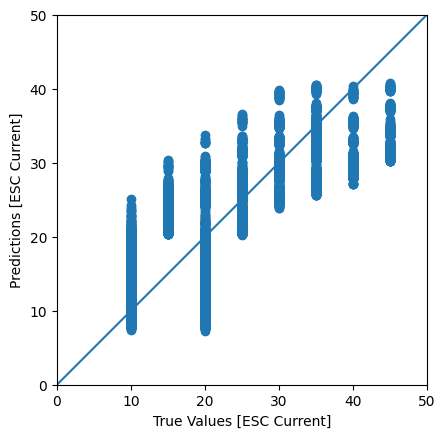

In [18]:
# Generate Plot for predictions
testPred5 = multiLinModelESCCurrent.predict(testFeaturesSubs).flatten()

a = plt.axes(aspect='equal')
plt.scatter(testESCCurrent, testPred5)
plt.xlabel('True Values [ESC Current]')
plt.ylabel('Predictions [ESC Current]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

**Model 6 - Battery Capacity from Inputs**

[[ 1.5284307  5.0584254  9.354618  18.572096 ]]
First example: [[ 0.58  3.85  5.79 13.4 ]]

Normalized: [[-1.39 -0.57 -0.73 -0.74]]
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normaliza  (None, 4)                 9         
 tion)                                                           
                                                                 
 dense_6 (Dense)             (None, 1)                 5         
                                                                 
Total params: 14 (60.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 9 (40.00 Byte)
_________________________________________________________________


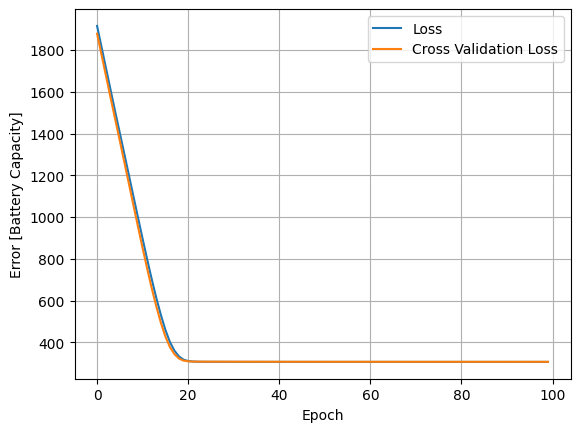

In [19]:
# Load data for the model
trainFeatures = train_data.copy()
testFeatures = test_data.copy()

# Identify the prediction variable
trainBattCap = trainFeatures.pop('BattCap')
testBattCap = testFeatures.pop('BattCap')

# Remove all non-input variables
trainFeaturesSubs = train_data[['MTOW','Range','Endurance','MaxSpeed']]
testFeaturesSubs = test_data[['MTOW','Range','Endurance','MaxSpeed']]

# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesSubs))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesSubs[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# As all input variables are already normalised, run model
multiLinModelBattCap = LinearModel(normalizer)

multiLinModelBattCap.summary()

# Run Model Fitting
history6 = multiLinModelBattCap.fit(
    trainFeaturesSubs,
    trainBattCap,
    validation_split=0.2,
    verbose=0, epochs=100)

# Define Error String
errorStr6 = 'Battery Capacity'

# Plot Loss Function
plotLoss(history6,errorStr6)

# As the model is multivariate, save test results (cannot plot)
testResults['multiLinModelBattCap'] = multiLinModelBattCap.evaluate(
    testFeaturesSubs,testBattCap,
    verbose=0)

323/323 [==============================] - 0s 872us/step


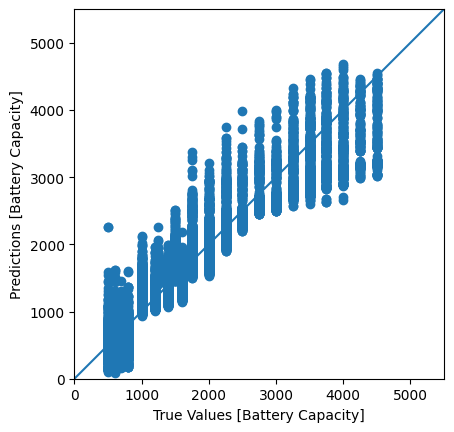

In [20]:
# Generate Plot for predictions
testPred6 = multiLinModelBattCap.predict(testFeaturesSubs).flatten()

a = plt.axes(aspect='equal')
plt.scatter(testBattCap, testPred6)
plt.xlabel('True Values [Battery Capacity]')
plt.ylabel('Predictions [Battery Capacity]')
lims = [0, 5500]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

**Model 7 - Battery Discharge from Inputs**

[[ 1.5284307  5.0584254  9.354618  18.572096 ]]
First example: [[ 0.58  3.85  5.79 13.4 ]]

Normalized: [[-1.39 -0.57 -0.73 -0.74]]
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normaliza  (None, 4)                 9         
 tion)                                                           
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 14 (60.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 9 (40.00 Byte)
_________________________________________________________________


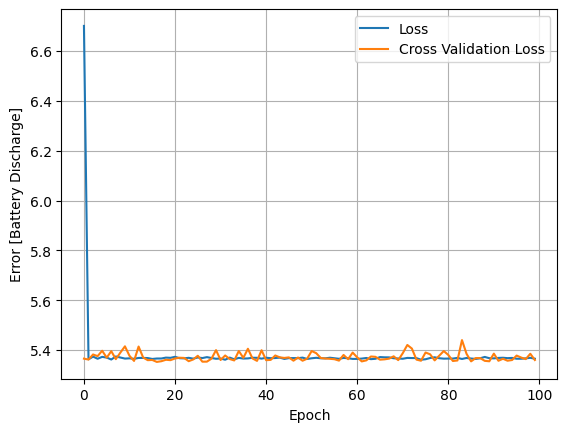

In [21]:
# Load data for the model
trainFeatures = train_data.copy()
testFeatures = test_data.copy()

# Identify the prediction variable
trainBattDischarge = trainFeatures.pop('BattDischarge')
testBattDischarge = testFeatures.pop('BattDischarge')

# Remove all non-input variables
trainFeaturesSubs = train_data[['MTOW','Range','Endurance','MaxSpeed']]
testFeaturesSubs = test_data[['MTOW','Range','Endurance','MaxSpeed']]

# Configure normalisation
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(trainFeaturesSubs))
print(normalizer.mean.numpy())

# Normalise Data without prediction variable
first = np.array(trainFeaturesSubs[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

# As all input variables are already normalised, run model
multiLinModelBattDischarge = LinearModel(normalizer)

multiLinModelBattDischarge.summary()

# Run Model Fitting
history7 = multiLinModelBattDischarge.fit(
    trainFeaturesSubs,
    trainBattDischarge,
    validation_split=0.2,
    verbose=0, epochs=100)

# Define Error String
errorStr7 = 'Battery Discharge'

# Plot Loss Function
plotLoss(history7,errorStr7)

# As the model is multivariate, save test results (cannot plot)
testResults['multiLinModelBattDischarge'] = multiLinModelBattDischarge.evaluate(
    testFeaturesSubs,testBattDischarge,
    verbose=0)

323/323 [==============================] - 0s 802us/step


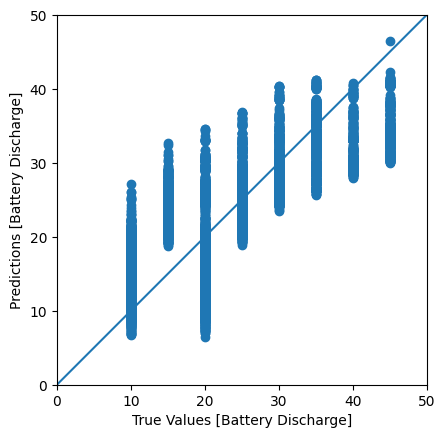

In [22]:
# Generate Plot for predictions
testPred7 = multiLinModelBattDischarge.predict(testFeaturesSubs).flatten()

a = plt.axes(aspect='equal')
plt.scatter(testBattDischarge, testPred7)
plt.xlabel('True Values [Battery Discharge]')
plt.ylabel('Predictions [Battery Discharge]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [23]:
# Print Test Results
pd.DataFrame(testResults, index=['Mean Absolute Error']).T

,Mean Absolute Error
multiLinModelKV,262.852905
multiLinModelmotDiam,1.899826
multiLinModelpropDiam,0.543538
multiLinModelpropPitch,0.927313
multiLinModelESCCurrent,5.298694
multiLinModelBattCap,304.970215
multiLinModelBattDischarge,5.349301
